Day5-2 作業

1.1. 讀取 txt 檔, 請讀取 text file

https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

1.2 將所提供的 txt 轉成 pandas dataframe

2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片

In [ ]:
# 抓取資料
!wget https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

--2020-07-19 06:20:22--  https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 784663 (766K) [text/plain]
Saving to: ‘imagenet_urls_examples.txt’

imagenet_urls_examp 100%[===================>] 766.27K  --.-KB/s    in 0.1s    

2020-07-19 06:20:22 (5.30 MB/s) - ‘imagenet_urls_examples.txt’ saved [784663/784663]



In [ ]:
import pandas

with open('imagenet_urls_examples.txt','r') as f:
  lines=f.readlines()

#fw=open('imagenet_urls_examples.csv','a')

data=[]
for line in lines:
  t=line.replace('\n','').split('\t')
  data.append(t)
  #fw.write(t[0]+','+t[1])
    
print(data)

#fw.close()

[['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'], ['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'], ['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'], ['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'], ['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg'], ['n00015388_373', 'http://img172.imageshack.us/img172/4606/napo03072en9.jpg'], ['n00015388_379', 'http://fotootjesvanannelies.web-log.nl/olifantfotootjes/images/2008/06/04/img_8870.jpg'], ['n00015388_388', 'http://www.deweekkrant.nl/images/library/pictures/4f/2e/a5/cf/2_3d81b762a5e8a345bbb1f0884fab2e9762146129.jpg'], ['n00015388_442', 'http://www.porschemania.it/discus/messages/815/102099.jpg'], ['n00015388_474', 'http://farm1.static.flickr.com/72/225029238_805b0937ca.jpg'], ['n00015388_514', 'http://farm2.static.flickr.com/1128/1432436038_6c131f1bb0.jpg'], ['n00015388_671', 'http:/

In [ ]:
# 讀取txt檔的內容,並轉換成dataframe
df_imgnet=pandas.DataFrame(data[0:])
df_imgnet.columns=['no','url']
df_imgnet.head()


,no,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


In [62]:
# 依據給定url下載圖片並顯示
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import requests

def url_to_img(url):
  response=requests.get(url)
  
  if response.status_code != 200:
    return None

  img=Image.open(BytesIO(response.content))

  return img

0    http://farm1.static.flickr.com/145/430300483_2...
1    http://farm2.static.flickr.com/1005/3352960681...
2    http://farm1.static.flickr.com/27/51009336_a96...
3    http://farm4.static.flickr.com/3025/2444687979...
4    http://img100.imageshack.us/img100/3253/forres...
Name: url, dtype: object


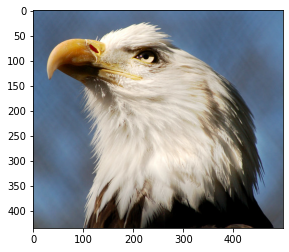

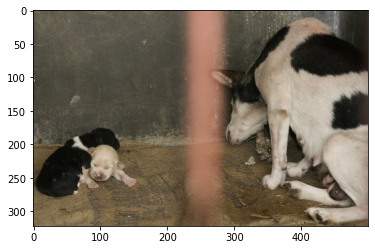

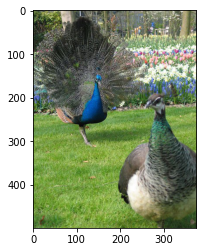

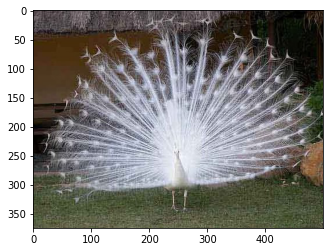

In [63]:
# 先抓出前五筆資料的img url
# 備註:第五筆url不存在,所以只顯示4張圖片
url_list=df_imgnet[0:5]['url']
no_list=df_imgnet[0:5]['no']
print(url_list)

for url in url_list:
  img=url_to_img(url)

  if img is not None:
    plt.imshow(img)
    plt.show()
